# Import Packages

In [2]:
#calculation
import pandas as pd
import torch
import numpy as np
from scipy import stats
import csv

#plot
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#model
try: 
    import transformers
except:
    !pip install transformers
    import transformers
    from transformers import AutoTokenizer


import nltk
from nltk.tokenize import (TreebankWordTokenizer,
                           word_tokenize,
                           wordpunct_tokenize,
                           TweetTokenizer,
                           MWETokenizer)

#Naive Bayesian Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#tokenizer packages
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

2022-12-01 15:29:33.875822: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package punkt to /Users/sehee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/sehee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sehee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/sehee/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


ModuleNotFoundError: No module named 'google.colab'

# Process Data

## import data

In [8]:
#import data
#all data
data_df = pd.read_csv('train.csv')

#dataframe with lemma
lemma_df = pd.read_csv('train_data_with_lemmas.csv').drop(columns = 'Unnamed: 0')

#dictionary
dictionary_df = pd.read_csv('dictionary.csv')

#word vector with frequency
frequency_token_list = np.load('frequency_token.npy')

#word vector with presence
attention_mask_list = np.load('attention_mask.npy')

#sentence length for each article
sentence_len_list = []
with open("sentence_length.csv", "r") as f:
    rd = csv.reader(f)
    for row in rd:
        sentence_len_list.append([int(num) for num in row])
average_sentence_len_list = [np.mean(sentence_len) for sentence_len in sentence_len_list]

#list of all socres
score_list = data_df['vocabulary'].to_numpy()

In [9]:
mask = np.array(attention_mask_list)
avg_sen = np.array(average_sentence_len_list)

In [16]:
# check if there is misspelling using a separate dictionary
# if the word is not in the separate dictionary, do not include it in the freq_sum
# also additionally when going through the for loop, you can even deduct points for misspelling


dictionary_df.head()

,Unnamed: 0,think,student,would,benefit,learning,home,wont,change,get,...,dived,diveded,betweend,loook,coorperation,challlenge,likley,thorugh,relgions,1/4th
0,position_index,0,1,2,3,4,5,6,7,8,...,20325,20326,20327,20328,20329,20330,20331,20332,20333,20334
1,word_len,5,7,5,7,8,4,4,6,3,...,5,7,8,5,12,10,6,7,8,5
2,sample_frequency,6382,17138,7154,1336,1477,3058,341,2770,8653,...,1,1,1,1,1,2,1,1,1,1


In [177]:
#Also, what is cleaned lemma list? It still has words like "wont", "dived",diveded", "betweend", "loook"

#Oh, we can simply drop the words with sample_frequency 1 (not perfect, but possible)


In [17]:
freq = dictionary_df.iloc[2,1:]
freq = np.array(freq).astype(np.float)

/var/folders/fj/x44c9rks0w5ggb2l4x0hzjnc0000gn/T/ipykernel_21123/1681241085.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  freq = np.array(freq).astype(np.float)


In [18]:
frequency_token_list
#what is the meaning of frequency token list?

array([[2., 5., 1., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       [1., 5., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 1., 1., 1.],
       [2., 0., 1., ..., 0., 0., 0.],
       [4., 0., 2., ..., 0., 0., 0.]])

In [19]:
#freq_sum = frequency_token_list.sum(axis=0)
#freq_rank = stats.rankdata(freq_sum)

In [20]:
sum(freq == 1)
#10595 number of misspellings?

10595

In [21]:
#freq_rank = len(freq_sum) - stats.rankdata(freq_sum).astype(int)
freq_rank = len(freq) - stats.rankdata(freq).astype(int)
np.unique(freq_rank)

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          74,    75,    76,    77,    78,    79,    80,    81,    82,
          83,    84,    85,    86,    87,    88,    89,    90,    91,
          92,    93,    94,    95,    96,    97,    98,    99,   100,
         101,   102,   103,   104,   105,   106,   107,   108,   109,
         110,   111,   112,   113,   114,   115,   117,   118,   119,
         120,   121,   122,   123,   124,   125,   126,   127,   128,
         129,   130,

In [23]:
points_vec = np.zeros(20335)
for i in range(20335):
    if freq_rank[i] > 10000 :
        points_vec[i] = 0
    elif freq_rank[i] > 1000 :
        points_vec[i] = 7
    elif freq_rank[i] > 800 :
        points_vec[i] = 6
    elif freq_rank[i] > 500 :
        points_vec[i] = 5
    elif freq_rank[i] > 300 :
        points_vec[i] = 4
    elif freq_rank[i] > 100 :
        points_vec[i] = 3
    elif freq_rank[i] > 50 :
        points_vec[i] = 2
    else:
        points_vec[i] = 1

In [25]:
#calculate the points for each student i
points_stu = np.zeros(3911)
for i in range(3911):
    #points_stu[i] = sum(mask[i]*frequency_token_list[i])
    points_stu[i] = sum(mask[i]*points_vec)

In [26]:
from sklearn.linear_model import LinearRegression
X = np.transpose(np.array([avg_sen, points_stu]))
y = data_df.iloc[:,4]
reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.1857962196506575

(array([2.66523506e-02, 2.69150216e-02, 8.59809733e-03, 2.80182398e-03,
        1.29584359e-03, 7.17967394e-04, 4.72807796e-04, 2.97693798e-04,
        1.40091199e-04, 8.75569993e-05, 5.25341996e-05, 5.25341996e-05,
        7.00455995e-05, 5.25341996e-05, 7.00455995e-05, 1.75113999e-05,
        3.50227997e-05, 1.75113999e-05, 5.25341996e-05, 1.75113999e-05,
        1.75113999e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.75113999e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50227997e-05]),
 array([  6.44827586,  21.04956897,  35.65086207,  50.25215517,
         64.85344828,  79.45474138,  94.05603448, 108.65732759,
        123.25862069, 137.85991379, 152.4612069 , 167.0625    ,
        181.6637931 , 196.26508621, 210.86637931, 225.46767241,
        240.06896552, 

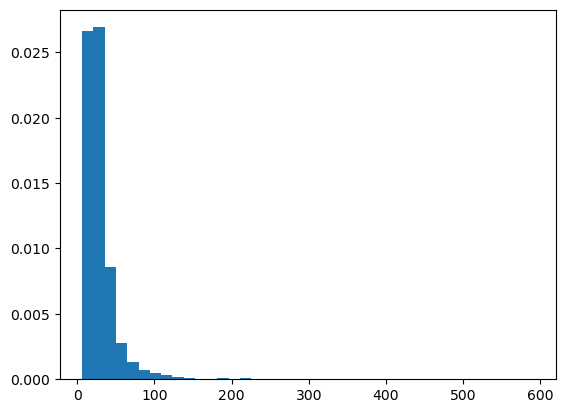

In [14]:
plt.hist(avg_sen,density = True, bins = 40)

(array([5.76897204e-05, 2.06034716e-04, 5.60414426e-04, 1.48344995e-03,
        2.29934743e-03, 3.12348629e-03, 2.63724436e-03, 2.94217574e-03,
        2.77734797e-03, 2.44769242e-03, 2.16748521e-03, 2.03562299e-03,
        1.91200216e-03, 1.42576023e-03, 1.16203580e-03, 9.64242469e-04,
        8.40621640e-04, 6.26345535e-04, 4.28552208e-04, 3.46138322e-04,
        3.46138322e-04, 2.96689990e-04, 2.30758881e-04, 2.22517493e-04,
        1.64827772e-04, 1.97793327e-04, 2.47241659e-05, 5.76897204e-05,
        1.64827772e-05, 4.12069431e-05, 3.29655545e-05, 4.12069431e-05,
        1.64827772e-05, 1.64827772e-05, 3.29655545e-05, 1.64827772e-05,
        1.64827772e-05, 0.00000000e+00, 8.24138862e-06, 8.24138862e-06]),
 array([  26.   ,   57.025,   88.05 ,  119.075,  150.1  ,  181.125,
         212.15 ,  243.175,  274.2  ,  305.225,  336.25 ,  367.275,
         398.3  ,  429.325,  460.35 ,  491.375,  522.4  ,  553.425,
         584.45 ,  615.475,  646.5  ,  677.525,  708.55 ,  739.575,
      

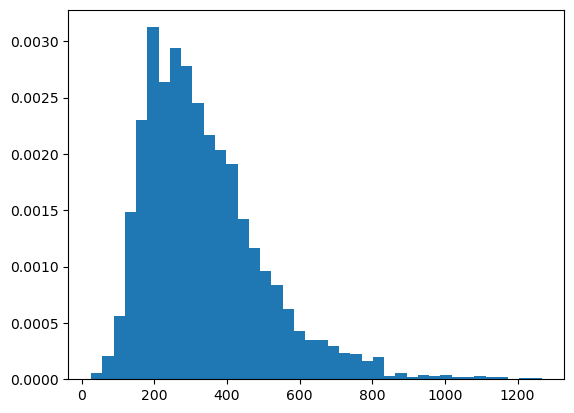

In [27]:
plt.hist(points_stu,density = True, bins = 40)

## Data Exploration

In [6]:
data_sample_size = data_df.shape[0]
print('There are', data_df.shape[0], 'samples in total')

There are 3911 samples in total


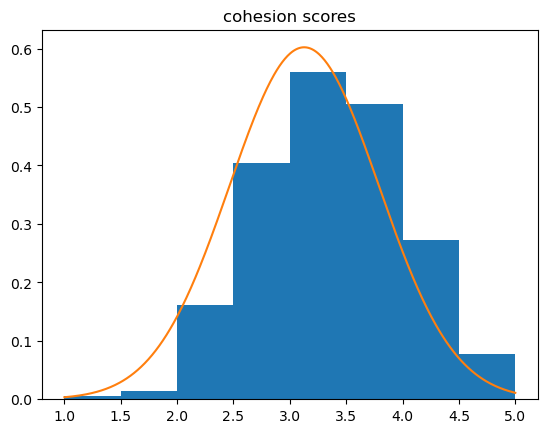

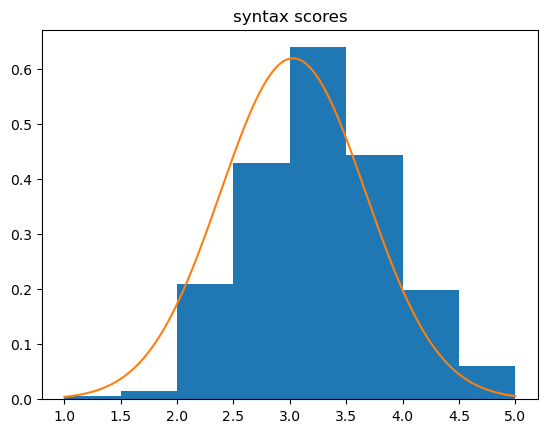

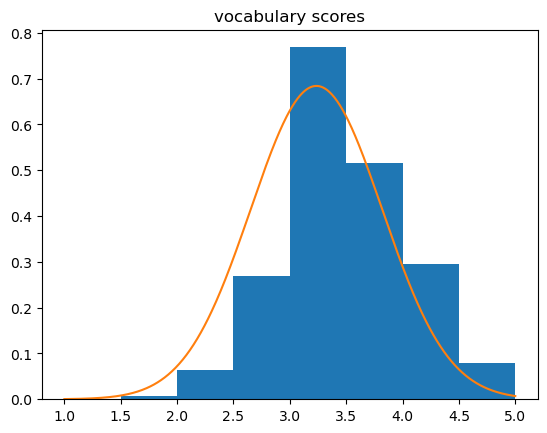

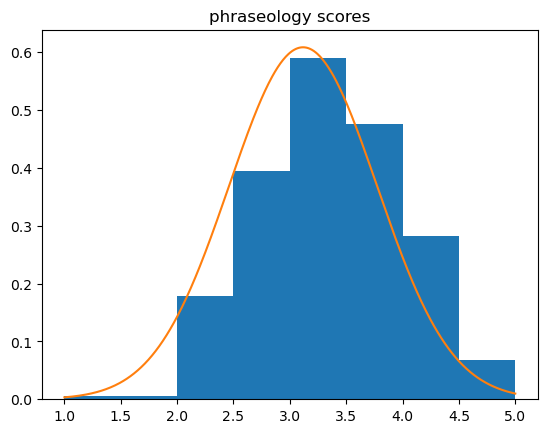

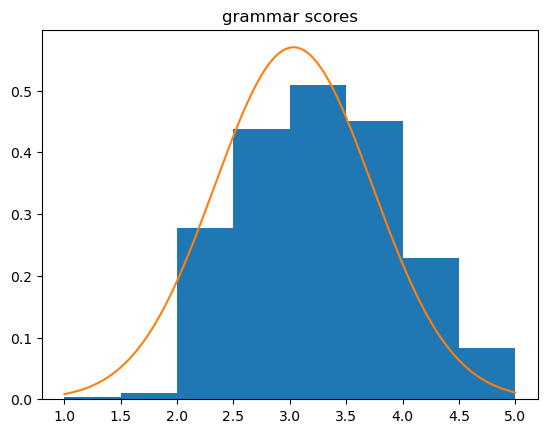

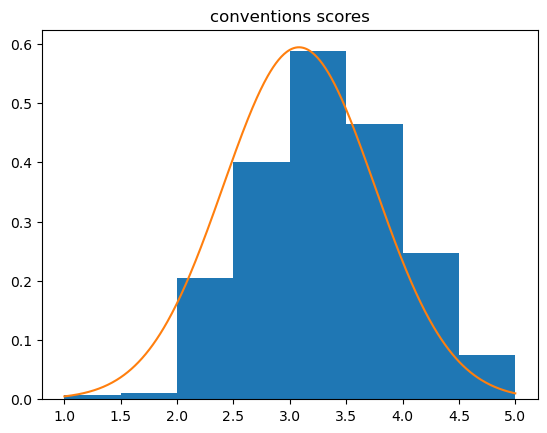

In [7]:
for i in range(2,len(data_df.columns)):
    term = data_df.columns[i]
    x = data_df[term]
    
    mean = np.mean(x)
    std = np.std(x)
    
    fit_x = np.linspace(1,5,500)
    fit_y = stats.norm.pdf(fit_x,mean,std)
    
    
    plt.figure()
    plt.hist(x,density = True,bins = 8)
    plt.plot(fit_x,fit_y)
    plt.title(term+' scores')
    
    plt.show()

In [8]:
score_df = data_df[data_df.columns[2:]]
score_df.corr()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
cohesion,1.000000,0.695459,0.666151,0.690058,0.638689,0.666151
syntax,0.695459,1.000000,0.680562,0.725467,0.709525,0.700025
vocabulary,0.666151,0.680562,1.000000,0.735261,0.654852,0.664292
phraseology,0.690058,0.725467,0.735261,1.000000,0.719746,0.666842
grammar,0.638689,0.709525,0.654852,0.719746,1.000000,0.673301
conventions,0.666151,0.700025,0.664292,0.666842,0.673301,1.000000


## Lemmatization (Not necessary to Run)

In [9]:
train_text = data_df['full_text']
lemma_lists = []
n_words_list = []
word_length_lists = []
lemmatizer = WordNetLemmatizer()
for i in range(len(train_text)):
  words = word_tokenize(train_text[i])
  words = [word.lower() for word in words]
  n_words = len(words)
  n_words_list.append(n_words)
  word_lengths = [len(word) for word in words]
  word_lengths.sort()
  
  stopwords_set = set(stopwords.words('english'))
  words = [word for word in words if not word in stopwords_set]
  
  lemma_list = [lemmatizer.lemmatize(word) for word in words]
  lemma_lists.append(lemma_list)

KeyboardInterrupt: 

## Cleaning Lemmas (Not neccesary to run)

In [25]:
#cleaning lemma
punctuation_list = ['',',','.','?','!',';',':','"ll"']
lemma_list = lemma_df['lemmas']
dictionary = {}
cleaned_lemma_list = []
index = 0
for lemma in lemma_list:
    lemma = lemma[1:-1]
    clean_lemma = lemma.replace("'", '')
    clean_lemma = clean_lemma.replace(" ", '')
    split_lemma = clean_lemma.split(",")
    for mark in punctuation_list:
        while split_lemma.count(mark):
            split_lemma.remove(mark)
    cleaned_lemma_list.append(split_lemma)

## sentence tokenizer (Not neccesary to run)

In [57]:
#split by sentence
text_list = data_df['full_text']
sentence_len_list = []
for text in text_list:
    sentence_len = []
    sentence_token = sent_tokenize(text)
    for sentence in sentence_token:
        word_list = word_tokenize(sentence)
        for mark in punctuation_list:
            while word_list.count(mark):
                word_list.remove(mark)
        length = len(word_list)
        sentence_len.append(length)
    sentence_len_list.append(sentence_len)

In [50]:
with open("/content/drive/MyDrive/Colab Notebooks/sentence_length.csv", "w") as f:
    wr = csv.writer(f)
    wr.writerows(sentence_len_list)

In [69]:
average_sentence_len_list = [np.mean(sentence_len) for sentence_len in sentence_len_list]
print(average_list)

[14.666666666666666, 38.285714285714285, 17.36842105263158, 21.13888888888889, 78.0, 16.45, 23.944444444444443, 17.681818181818183, 25.130434782608695, 25.125, 29.0, 23.055555555555557, 40.4, 27.4, 16.975609756097562, 43.57142857142857, 44.888888888888886, 26.03846153846154, 17.46153846153846, 14.4, 20.263157894736842, 21.45, 26.0, 39.75, 13.093023255813954, 23.5, 36.6, 18.24137931034483, 31.0, 25.11111111111111, 16.8, 40.45454545454545, 50.4, 17.166666666666668, 28.48780487804878, 20.142857142857142, 22.071428571428573, 19.954545454545453, 17.379310344827587, 313.0, 22.066666666666666, 22.307692307692307, 47.22222222222222, 20.217391304347824, 20.37142857142857, 84.0, 22.53846153846154, 57.333333333333336, 27.181818181818183, 36.03225806451613, 22.92452830188679, 50.5, 28.333333333333332, 39.09090909090909, 12.23076923076923, 22.833333333333332, 25.0, 28.444444444444443, 23.78723404255319, 28.846153846153847, 22.545454545454547, 21.4375, 41.3, 23.26086956521739, 37.63636363636363, 14.

## Build a Dictionary from the sample sapce

In [90]:
dictionary = {}
index = 0
for lemma in cleaned_lemma_list:
    for word in lemma:
        if word not in dictionary:
            dictionary[word] = [index,0,0]
            index += 1

for lemma in cleaned_lemma_list:
    for word in lemma:
        word_len = len(word)
        dictionary[word][1] = word_len
        dictionary[word][2] += 1

In [91]:
#save dictionary
dictionary_df = pd.DataFrame(dictionary, index = ['position_index','word_len','sample_frequency'])
dictionary_df.to_csv('/content/drive/MyDrive/Colab Notebooks/dictionary.csv')

## Vectorization

In [78]:
#create a space to store 
frequency_token_list = np.zeros([data_sample_size, len(dictionary)])
for i in range(data_sample_size):
    for word in cleaned_lemma_list[i]:
        frequency_token_list[i, dictionary[word]] += 1

#create a attention mask
attention_mask_list = np.zeros([data_sample_size, len(dictionary)])
for i in range(frequency_token_list.shape[0]):
    for j in range(frequency_token_list.shape[1]):
        if frequency_token_list[i,j] > 0:
            attention_mask_list[i,j] = 1
print(attention_mask_list)

#np.save('/content/drive/MyDrive/Colab Notebooks/frequency_token.npy',frequency_token_list)
#np.save('/content/drive/MyDrive/Colab Notebooks/attention_mask.npy',attention_mask_list)

[[1. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]]


# Naive Bayes

## Naive Bayes Models

In [93]:
X = attention_mask_list
y = score_list*2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

score_dict = {}
for score in y:
    if str(score) not in score_dict:
        score_dict[str(score)] = 1
    else:
        score_dict[str(score)] += 1

In [94]:
clf = MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
clf.fit(X_train, y_train)

MultinomialNB(alpha=0.3, fit_prior=False)

In [99]:
y_train_pred = clf.predict(X_train)
print('Accuracy is on trainging set is', np.sum([y_train_pred == y_train])/len(y_train))

y_pred = clf.predict(X_test)
print('Accuracy is on testing set is', np.sum([y_pred == y_test])/len(y_test))

y_train_pred = clf.predict(X_train)
test_cm = confusion_matrix(y_test, y_pred)
train_cm = confusion_matrix(y_train, y_train_pred)
test_name_list = []
original_list = []
for score in set(y):
    test_name_list.append('Predicted as '+str(score))
    original_list.append('True Value is '+str(score))

Accuracy is on trainging set is 0.8768115942028986
Accuracy is on testing set is 0.3853035143769968


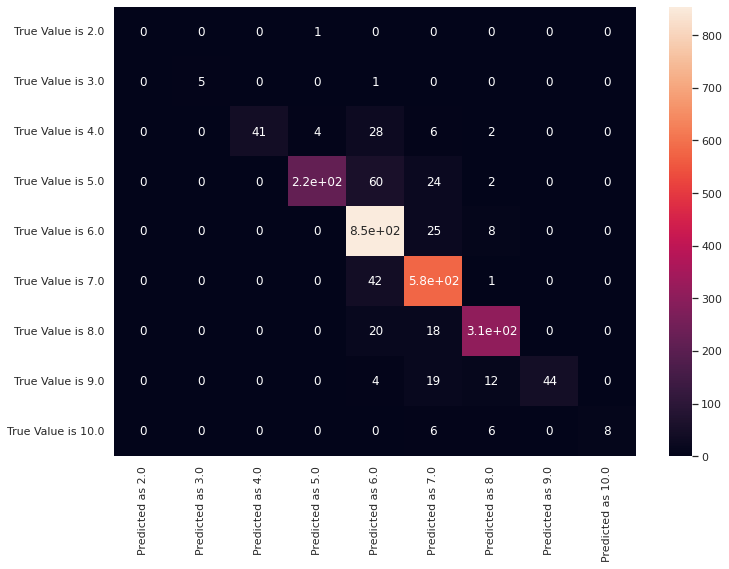

In [101]:
cm_train_df = pd.DataFrame(train_cm, columns = test_name_list, index = original_list)
cm_test_df = pd.DataFrame(test_cm, columns = test_name_list, index = original_list)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(cm_train_df, annot=True)

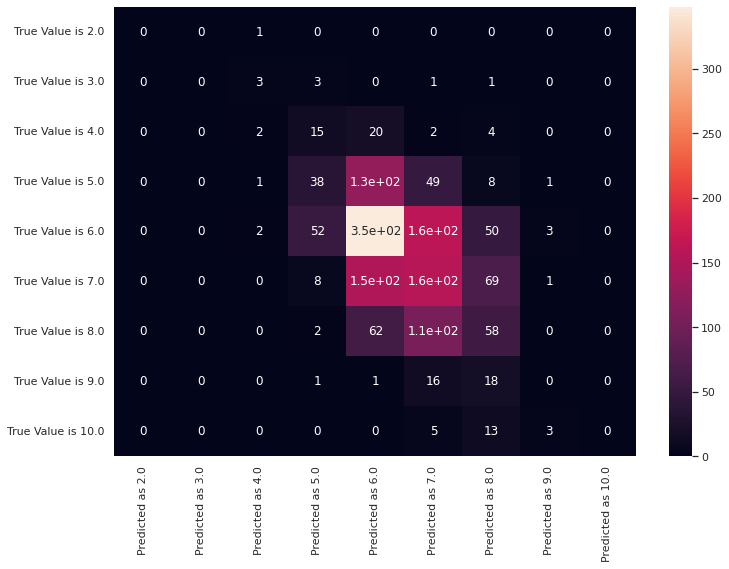

In [103]:
sns.heatmap(cm_test_df, annot=True)

## Further Exploration on Data

In [86]:
X.shape

(3911, 21549)

In [57]:
score_dictionary = {} #sample arranged by scores
for i in range(data_sample_size):
    score = y[i]
    if score not in score_dictionary:
        score_dictionary[score] = [X[i,:]]
    else:
        score_dictionary[score].append(X[i,:])

total_score_dictionary = {} #word appear in each score group
for element in score_dictionary:
    total_score_dictionary[element] = np.zeros(len(dictionary))
    for token in score_dictionary[element]:
        total_score_dictionary[element] += token

for element in total_score_dictionary:
    total_score_dictionary[element] = (total_score_dictionary[element] != np.zeros(len(dictionary))).astype(int)

mid_score_sample = total_score_dictionary[6.0]+total_score_dictionary[7.0]
high_score_sample = total_score_dictionary[10.0]

additional_words = np.sum([high_score_sample-mid_score_sample > 0] )
print('The articles used', additional_words,' more words than mid socre samples')

The articles used 434  more words than mid socre samples


In [ ]:
#difference between 6 & 7 socre groups
mid_score_sample = total_score_dictionary[6.0]
high_score_sample = total_score_dictionary[7.0]

additional_words = np.sum([high_score_sample-mid_score_sample > 0] )
print('The higher scores articles used', additional_words,' more words than mid socre samples')

In [ ]:
for element in score_dictionary:
    print('There are ',len(score_dictionary[element]),'samples with score',element)

In [85]:
common_word = np.zeros(len(total_score_dictionary[2.0]))
for element in total_score_dictionary:
    common_word = common_word + total_score_dictionary[element]
for i in range(len(common_word)):
    if common_word[i] == 9:
        common_word[i] = 1
    else:
        common_word[i] = 0
X

array([[ 1.,  2.,  4., ...,  0.,  0.,  0.],
       [22.,  7., 19., ...,  0.,  0.,  0.],
       [ 1.,  1., 14., ...,  0.,  0.,  0.],
       ...,
       [ 3.,  1.,  7., ...,  1.,  1.,  1.],
       [ 0.,  2., 22., ...,  0.,  0.,  0.],
       [ 2.,  4., 16., ...,  0.,  0.,  0.]])

# Bayesian Regression Model